<a href="https://colab.research.google.com/github/fmejias/CienciasDeLosDatosTEC/blob/master/TP2_mmora.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Matemáticas para Ciencias de los Datos:
# Trabajo práctico 2

- Professor: M.Sc.Saul Calderon.

- Students: 
    - Felipe Alberto Mejías Loría, Instituto Tecnológico de Costa Rica. 
    - María Auxiliadora Mora, Instituto Tecnológico de Costa Rica  

- June 1rst, 2019   

# Importing dependencies

In [0]:
# Since Collab is being used, it is necessary to install Pytorch
!pip install torch
# Libraries required for the exercises
import math
import numpy as np

import torch
from torch.distributions import constraints
from torch.distributions.distribution import Distribution
from torch.distributions.utils import _standard_normal, lazy_property

import torch.distributions as distrib

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

from numpy import linalg as linalg



# (20 puntos) Escriba la función generarPuntosPlano


Matrix X: 
 tensor([[  3.0000,   3.6000,   4.2000,   4.8000,   5.4000,   6.0000,   6.6000,
           7.2000,   7.8000,   8.4000,   9.0000,   9.6000,  10.2000,  10.8000,
          11.4000,  12.0000,  12.6000,  13.2000,  13.8000,  14.4000],
        [ 20.0000,  26.5000,  33.0000,  39.5000,  46.0000,  52.5000,  59.0000,
          65.5000,  72.0000,  78.5000,  85.0000,  91.5000,  98.0000, 104.5000,
         111.0000, 117.5000, 124.0000, 130.5000, 137.0000, 143.5000],
        [ 20.6436,  27.2316,  33.7929,  40.5018,  47.0759,  53.6827,  60.3656,
          67.0383,  73.6075,  80.1696,  86.7951,  93.4818, 100.0522, 106.6902,
         113.2675, 119.9885, 126.5117, 133.0531, 139.7811, 146.3519]])


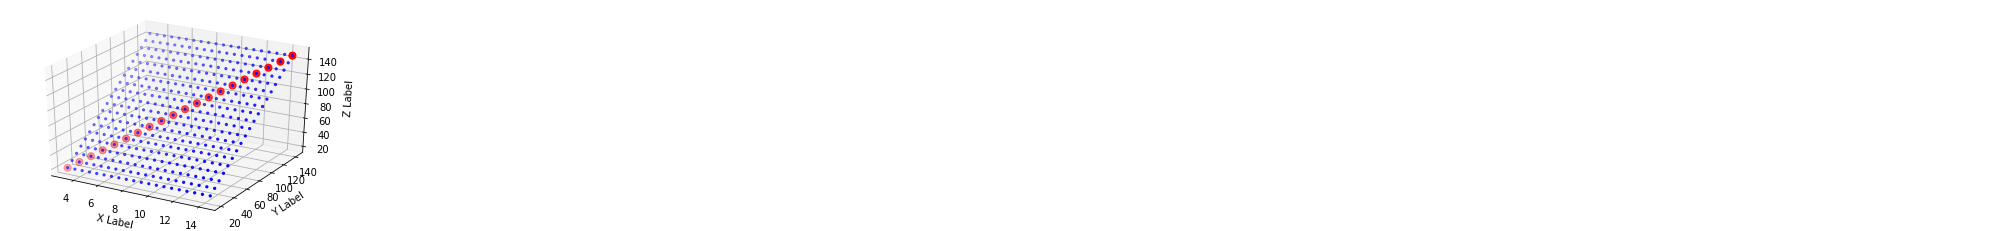

Dimensiones de matrizX torch.Size([3, 20])
torch.Size([20, 3])


In [0]:
# Exercise 1.Ejercicio de Felipe
def generarPuntosPlano(n=20, mean=0, standardDeviation=0.05):
  """
  This function calculates a dataset and the plot them in 3D
  n: number of points
  mean: mean for the Gaussian distribution
  standardDeviation: standardDeviation for the Gaussian distribution
  return a plot in 3D of the dataset
  """
  
  def scatterPlotDataset3D(x, y ,z, epsilon):
    """
    Scatter plot the dataset
    param dataset: dataset to plot  
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Create 2D tensors with variation along the two axis
    X,Y = torch.meshgrid(x, y)

    # Compute hiperplane function to scattered all plane
    Z = 0.2 * X + Y + epsilon
    
    # Scattered all plane
    ax.scatter(X.numpy(), Y.numpy(), Z.numpy(), c='b', marker='.')
    
    # Scattered n points
    ax.scatter(x.numpy(), y.numpy(), z.numpy(), s=50, c='r', marker='o')

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')

    plt.show()
    
  def epsilon():
    """
    Create Dataset with gaussian distribution
    param numSamples, number of samples
    """
    #create Gaussian distribution
    distribution = distrib.Normal(mean, standardDeviation)
    #create dataset from distribution
    return distribution.sample((n,))
  
  def plottingPlane():
    
    # Create 1D tensors x and y
    x = torch.arange(3, 15, 0.6)
    y = torch.arange(20, 150, 6.5)    
    e = epsilon()
    
    # Hiperplane function
    z = 0.2 * x + y + e
    
    # Save points on a Matrix X
    matrixX = [x, y , z]
    matrixX = torch.stack(matrixX)
    print("Matrix X: \n", matrixX)
    
    # Scattered points in the plane
    scatterPlotDataset3D(x ,y, z, e)
    
    return matrixX

    
    
  # Plot the dataset  
  return plottingPlane()
  
  
# Test exercise 1
matrizX = generarPuntosPlano()

print("Dimensiones de matrizX", matrizX.shape)


matrizX = matrizX.transpose(0,1)
print(matrizX.shape)


# 2 (30 puntos) Cree una función calcularEigenvectoresYValores(X, n) la cual calcule los auto-vectores y auto-valores de tal matriz de covarianza Σ.


In [0]:
## Exercise 2
def covariance(A) :
    """
    Calculate the covariance of a matrix 
    A: Matrix with the set of samples.
    Return: The covariance matrix of A
    """
    # the rows mean of A  
    AMean= A.mean(1)

    #1 / (Number of samples - 1)
    n = (1/(A.shape[1]-1))
    
    #Calculate the transpose of the rows mean. 
    w2Drow = AMean.reshape(-1, AMean.shape[0])
    AMeanT = w2Drow.transpose(0, 1)
    
    # Calculate the mean of A minus A.
    UA = AMeanT - A
    
    # Compute the UA transpose. 
    UAT= UA.transpose(0,1)
    
    # Covariance of A
    Cov = n * UA.mm(UAT)
  
    return Cov


def calcularEigenvectoresYValores(X, n=2) :
     """
     param X:  dataset used to calculate its covariance matrix
     param n: number of eigen vectors to extract
     """

     #b) calculate the covariance matrix using TP1
      #use numpy cov function to calculate the covariance matrix
     Sigma = covariance(X.transpose(0,1))  
     print("Dimensiones matriz de covarianza",Sigma.shape)   

     #one eigen value per row, and its corresponding eigenvector per column
     EigenValues, EigenVectors = torch.eig(Sigma ,eigenvectors=True)
           
     return (EigenValues, EigenVectors)
    

EigenValues, EigenVectors = calcularEigenvectoresYValores(matrizX)

print("VALORES DE LOS AUTO-VECTORES Y AUTO-VALORES")
print("Eigen Values", EigenValues)
print("Eigen vectors", EigenVectors.shape)

# Pick the eigenvectors according to its eigen values
baseVectors = torch.zeros(3, 2)
baseVectors[:, 0] = EigenVectors[:, 0]
baseVectors[:, 1] = EigenVectors[:, 2]
print("Matriz de la base", baseVectors)



Dimensiones matriz de covarianza torch.Size([3, 3])
VALORES DE LOS AUTO-VECTORES Y AUTO-VALORES
Eigen Values tensor([[ 3.0246e+03,  0.0000e+00],
        [ 9.9225e-04,  0.0000e+00],
        [-2.9901e-06,  0.0000e+00]])
Eigen vectors torch.Size([3, 3])
Matriz de la base tensor([[-0.0645, -0.9966],
        [-0.6992,  0.0811],
        [-0.7120,  0.0107]])


# 3. (10 puntos) Verifique si tales auto-vectores son orto-normales, si es así, ¿porqué sucede esto?



In [0]:
## Exercise 3
def verifiqueEigenvectoresAutonormales(EigenVectors) :

     #verify that the norm of each eigenvector is one, since eigen vectors are orthonormals
     EigenVectorsNorm = linalg.norm(EigenVectors, axis=0)
     EigenVectorsShape0 = EigenVectors.shape[0]

     print("Norma de los Eigen-vectors: ", EigenVectorsNorm) 
        
     return (EigenVectorsNorm - EigenVectorsShape0).sum() < 0.1e-5 



print("¿Son los auto-vectores ortonormales?", verifiqueEigenvectoresAutonormales(EigenVectors))

Norma de los Eigen-vectors:  [1.         1.         0.99999994]
¿Son los auto-vectores ortonormales? True


## 4. (40 puntos) Reduzca la dimensionalidad de los datos


EigenValues tensor([[3.0243e+03, 0.0000e+00],
        [2.1151e-05, 0.0000e+00],
        [1.4970e-03, 0.0000e+00]])
numDataSamples 20
mean tensor
tensor([ 8.7000, 81.7500, 83.4807])


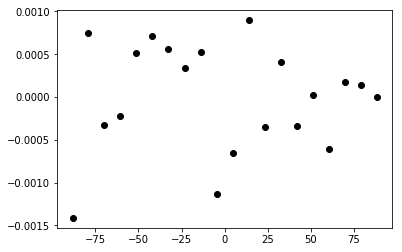

In [0]:
#Exercise 4
def reducirDimensionalidadDataset(dataset, baseVectors) :
    """
    Project the dataset using the base vectors 
    param dataset, dataset to project
    param basevectors, base vectors to use, one base vector per column
    """ 
    numDataSamples = dataset.shape[0]
    print("numDataSamples", numDataSamples)  

    #substract the mean to the data for data normalization
    mu = torch.mean(dataset, 0)
    dataset = dataset - mu
    print("mean tensor")
    print(mu)
  
  
    #2d data samples
    dataset2D = torch.zeros(numDataSamples, 2)
  
    #Use the baseVectors
    base1 = baseVectors[:, 0].squeeze()
    base2 = baseVectors[:, 1].squeeze()
  
    
    #for each sample, calculate its dot product into each base vector to build the 
    #vector with reduced dimensionality
    for i in range(0, numDataSamples):
       #squeeze to convert from 2d tensor to 1d tensor
       sample = dataset[i, :].squeeze()
       dataset2D[i, 0] = sample.dot(base1) 
       dataset2D[i, 1] = sample.dot(base2) 

    return dataset2D

def scatterPlot2D(dataset2D):
  """
  2D scatter plot of 2D data
  """
  plt.plot(dataset2D[:, 0].numpy(), dataset2D[:, 1].numpy(), 'o', color='black') 
  
  
print("EigenValues", EigenValues)
baseVectors = torch.zeros(3, 2)
#pick the eigenvectors according to its eigen values
baseVectors[:, 0] = EigenVectors[:, 0]
baseVectors[:, 1] = EigenVectors[:, 1]


reducedDimDataset = reducirDimensionalidadDataset(matrizX, baseVectors)
scatterPlot2D(reducedDimDataset)


In [0]:
# 5. (30 puntos) Calcule el error al usar los dos autovectores con mayores autovalores


#orthonormal base vectors
#baseVectors = torch.eye(3)

def calculaError(dataset,baseVectors) :
    baseVectorsPinv = torch.tensor(np.linalg.pinv(baseVectors))
    """
    A = baseVectors.mm(baseVectors.transpose(0, 1))
    B =baseVectors.mm(baseVectorsPinv)
    """

    #transpose dataset
    datsetT = dataset.transpose(0,1)
    
    # Calculate U: the set of samples with the subtracted media
    meanDataset = torch.mean(datsetT, 0)
    U = datsetT - meanDataset
    
    #project dataset using the new base vectors
    projectionDataset = baseVectors.mm(baseVectorsPinv).mm(U)

    #calculate the error of the projected samples
    criterion = torch.nn.MSELoss()
    error = torch.sqrt(criterion(projectionDataset, U))
    
    return(error)

error = calculaError(matrizX, baseVectors)
print("Error tomando en cuenta todas las muestras y los dos mejores auto-vectores")
print(error)

#a) Compare el error con usar sólo el mejor auto-vector ~v 1 . 
# Comente si disminuye o aumenta el error.
baseVectors2 = torch.zeros(3, 1)
#pick the eigenvectors according to its eigen values
baseVectors2[:, 0] = EigenVectors[:, 0]


error = calculaError(matrizX, baseVectors2)
print("Error tomando en cuenta todas las muestras y el mejor auto-vectore")
print(error)

Error tomando en cuenta todas las muestras y los dos mejores auto-vectores
tensor(3.2456)
Error tomando en cuenta todas las muestras y el mejor auto-vectore
tensor(32.7456)


https://skymind.ai/wiki/eigenvector

Change of Basis

Because the eigenvectors of the covariance matrix are orthogonal to each other, they can be used to reorient the data from the x and y axes to the axes represented by the principal components. You re-base the coordinate system for the dataset in a new space defined by its lines of greatest variance.

The x and y axes we’ve shown above are what’s called the basis of a matrix; that is, they provide the points of the matrix with x, y coordinates. But it is possible to recast a matrix along other axes; for example, the eigenvectors of a matrix can serve as the foundation of a new set of coordinates for the same matrix. Matrices and vectors are animals in themselves, independent of the numbers linked to a specific coordinate system like x and y.